In [1]:
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_task_set_from_txt(file):
    task_set = []
    with open(file, 'r') as txtfile:
        for line in txtfile:
            task = tuple(map(int, line.strip()[1:-1].split(', ')))
            task_set.append(task)
    return task_set

In [3]:
def lcm(a, b):
    return abs(a*b) // math.gcd(a, b)

def hyperperiod(periods):
    h = periods[0]
    for p in periods[1:]:
        h = lcm(h, p)
    return h

In [4]:

def schedulability(df):
    utilization = sum(df['execution'] / df['period'])
    if utilization <= 1:
        return 1
    else: 
        return 0

In [5]:
def least_slack_time(df,t):
    df['slack'] = df['nextdead'] - df['remaining']-t
    return df

In [6]:
sc=[]

In [7]:
def schedule_lst(df):
    for i in range(250): 
        task = df[df["arrival"] <= i][df["remaining"] > 0]
        if len(task) > 0:
            df1=least_slack_time(task,i)
            task = df1.sort_values('slack')
            #print(task)
            nexttask = task.index[0]  
            df.loc[nexttask, "remaining"] -= 1.0
            if i > 0 and sc[-1]['id'] == df.loc[nexttask, "id"] and sc[-1]['end time'] == i:
                sc[-1]['end time'] += 1
                sc[-1]['total time'] += 1
            else:
                dict_ = {'id': df.loc[nexttask, "id"], 'start time': i, 'end time': i + 1, 'total time': 1}
                sc.append(dict_)
        arrived = df[(i+1) % df['period'] == 0].index
        df.loc[arrived, 'remaining'] = df.loc[arrived, 'execution']
        df.loc[arrived, 'nextdead'] = df.loc[arrived, 'nextdead'] +df.loc[arrived,'period']
        for j in task.index:
            df.loc[j, 'slack'] = df.loc[j, 'slack']
        #print("i=", i)
        #print(df)
    return pd.DataFrame(sc)


In [8]:
task_set = read_task_set_from_txt("task_set.txt")
data = task_set
df = pd.DataFrame(data, columns=['id', 'execution', 'arrival', 'period', 'dead'])
df['remaining'] = df['execution']
df['nextdead'] = df['period']
df['slack']=df['nextdead']-df['execution']
df

,id,execution,arrival,period,dead,remaining,nextdead,slack
0,1,17,0,399,399,17,399,382
1,2,14,0,461,160,14,461,447
2,3,25,0,422,58,25,422,397
3,4,10,0,482,268,10,482,472
4,5,13,0,300,41,13,300,287
5,6,11,0,477,476,11,477,466
6,7,14,0,477,233,14,477,463
7,8,15,0,487,80,15,487,472
8,9,20,0,383,361,20,383,363
9,10,17,0,483,334,17,483,466


In [9]:
if schedulability(df):
    scheduled_tasks = schedule_lst(df)
    print(scheduled_tasks)
else:
    print("Not Schedulable")

     id  start time  end time  total time
0    14           0        18          18
1     5          18        31          13
2     9          31        50          19
3     1          50        51           1
4     9          51        52           1
..   ..         ...       ...         ...
131   8         243       244           1
132  10         244       245           1
133   8         245       246           1
134  10         246       247           1
135   8         247       250           3

[136 rows x 4 columns]


In [10]:
#sc

In [11]:
sc1=pd.DataFrame(sc)
sc1

,id,start time,end time,total time
0,14,0,18,18
1,5,18,31,13
2,9,31,50,19
3,1,50,51,1
4,9,51,52,1
...,...,...,...,...
131,8,243,244,1
132,10,244,245,1
133,8,245,246,1
134,10,246,247,1


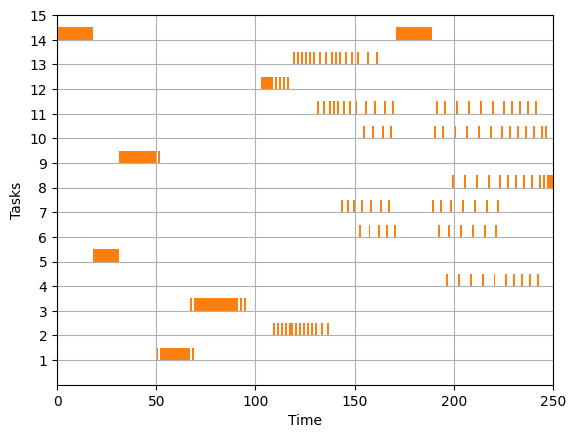

In [12]:
import matplotlib.pyplot as plt

fig, gnt = plt.subplots() 

gnt.set_ylim(0, 50)
gnt.set_xlim(0, 250)

gnt.set_xlabel('Time')
gnt.set_ylabel('Tasks')

tick = 10
tc = []
lab = []
for i in df['id']:
    tc.append(tick)
    lab.append(i)
    tick += 10

gnt.set_yticks(tc)
gnt.set_yticklabels(lab)

gnt.grid(True)

for item in sc:
    gnt.broken_barh([(item['start time'], item['end time'] - item['start time'])], (10 * item['id'], 5),
                     facecolors=('tab:orange'))

plt.show()
